In [30]:
import pandas as pd
from sklearn.cluster import KMeans
import pickle
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv('iris_scaled.csv')

In [32]:
df = df.drop(columns=['target','species'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [33]:
kmeans_model = KMeans(n_clusters=3, random_state=42)
kmeans_model.fit(df)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [34]:
df['cluster'] = kmeans_model.labels_
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,-0.900681,1.019004,-1.340227,-1.315444,1
1,-1.143017,-0.131979,-1.340227,-1.315444,2
2,-1.385353,0.328414,-1.397064,-1.315444,2
3,-1.506521,0.098217,-1.283389,-1.315444,2
4,-1.021849,1.249201,-1.340227,-1.315444,1


In [35]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df)
df['PC1'] = X_pca[:, 0]
df['PC2'] = X_pca[:, 1]

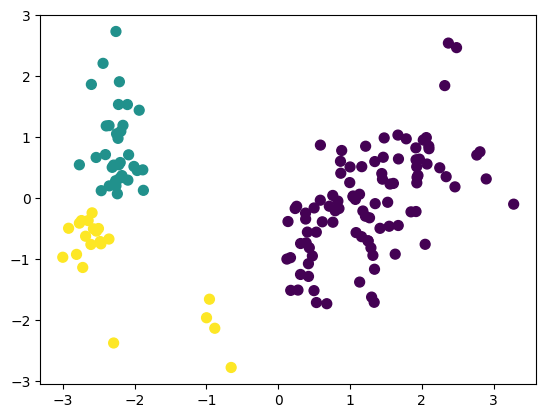

In [36]:
plt.scatter(df['PC1'], df['PC2'], c=df['cluster'], cmap='viridis',s=50)
plt.show()

In [37]:
with open('../models/kmeans_model.pkl', 'wb') as f:
    pickle.dump(kmeans_model, f)